# <span style="color:BLUE; font-weight:bold">ANÁLISIS BASE DE DATOS COVID-19</span>
## <span style="color:BLUE; font-weight:bold">Jefferson Martinez</span>
## <span style="color:BLUE; font-weight:bold">Ricardo Vargas</span>

### <span style="color:BLUE; font-weight:bold">IMPORTAR LIBRERIAS Y LLAMAR EL DATAFRAME</span>

In [84]:
#Traer libreria pandas para poderla utilizar
import pandas as pd

In [85]:
# leer el dataframe desde la pagina de origen
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

### <span style="color:BLUE; font-weight:bold">DIMENSIONAMIENTO DEL DATAFRAME</span>

In [86]:
#dimensionamiento en filas y columnas
df.shape

(289, 1147)

In [87]:
#nos entrega como se ve la base de datos en su base
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


### <span style="color:BLUE; font-weight:bold">ANÁLISIS DE DATOS NULOS Y TIPO DE DATOS</span>

In [88]:
#Encuentra los datos nulos y los suma por columna
df.isnull().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

In [89]:
#se crea la variable de columnas
col =df.columns

Se toma una muestra de las primeras 20 columnas para determinar la cantidad de datos nulos y el tipo de variables que tienen. De esta manera podemos visualizar en realidad como esta la base de datos y que debemos hacer con ella.

In [90]:
#tipo de datos de las primeras 20 columnas
#LAS COLUMNAS DE FECHAS NO TIENEN NIGUN VALOR NULO
df[col[:20]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  91 non-null     object 
 1   Country/Region  289 non-null    object 
 2   Lat             287 non-null    float64
 3   Long            287 non-null    float64
 4   1/22/20         289 non-null    int64  
 5   1/23/20         289 non-null    int64  
 6   1/24/20         289 non-null    int64  
 7   1/25/20         289 non-null    int64  
 8   1/26/20         289 non-null    int64  
 9   1/27/20         289 non-null    int64  
 10  1/28/20         289 non-null    int64  
 11  1/29/20         289 non-null    int64  
 12  1/30/20         289 non-null    int64  
 13  1/31/20         289 non-null    int64  
 14  2/1/20          289 non-null    int64  
 15  2/2/20          289 non-null    int64  
 16  2/3/20          289 non-null    int64  
 17  2/4/20          289 non-null    int

### <span style="color:BLUE; font-weight:bold">TRANSPOSICIÓN DE LA BASE DE DATOS</span>

La base de datos va a ser transpuesta ya que tiene un problema y es que por cada fecha crearon una columna. Lo que necesitamos es que todos los datos de las fecha queden en una sola columna.
Para poder realizar esta modificación, creamos una nueva columna llamada casos con ayuda del comando MELT, que nos permite redefinir el dataframe para poder ser analizado

In [91]:
# Transposición de la base de datos
col_id = col[:4] # COLUMNAS QUE PERMANECEN INTACTAS ( Province/State, Country/Region, Lat, Long)
valores = col[4:] # COLUMNAS QUE SON MODIFICADAS CON LAS FECHAS 
df_long = df.melt(id_vars=col_id,value_vars=valores,var_name="Fechas",value_name="Casos")


In [92]:
#Redefinimos nuevamente nuestro dataframe
df_long

,Province/State,Country/Region,Lat,Long,Fechas,Casos
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,535
330324,NaN,Yemen,15.552727,48.516388,3/9/23,11945
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,343135


Como se puede ver nuestro dataframe ha sido organizado de otra forma en donde solamente quedo con 6 Columnas y 330327 datos en las filas, de esta forma es mucho mas sencillo de analizar todo el dataframe y realizar la preparación para el analisis

### <span style="color:BLUE; font-weight:bold">CREAR ÍNDICES EN LA BASE DE DATOS</span>

 La Visualización del siguiente ejemplo es para saber si vale la pena mantener la variable PROVINVE/STATE dentro del dataframe, puesto que en algunos casos hay muchos datos nulos o Nan



In [93]:
df_long.loc[df_long["Country/Region"]=="Australia"]

,Province/State,Country/Region,Lat,Long,Fechas,Casos
9,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0
10,New South Wales,Australia,-33.8688,151.2093,1/22/20,0
11,Northern Territory,Australia,-12.4634,130.8456,1/22/20,0
12,Queensland,Australia,-27.4698,153.0251,1/22/20,0
13,South Australia,Australia,-34.9285,138.6007,1/22/20,0
...,...,...,...,...,...,...
330050,Queensland,Australia,-27.4698,153.0251,3/9/23,1800236
330051,South Australia,Australia,-34.9285,138.6007,3/9/23,883620
330052,Tasmania,Australia,-42.8821,147.3272,3/9/23,287507
330053,Victoria,Australia,-37.8136,144.9631,3/9/23,2880559


A pesar de que la columna PROVINCE/STATE tiene muchos valores nulos, puede ser de utilidad puesto que en algunos paises se encuentra y el analisis puede llevarse a una parte demografica especifica que nos puede ayudar en el futuro para sacar conclusiones. Por lo tanto la columna no sera eliminada


In [94]:
# Pasar las columnas "Country/Region", "Province/State" a indices de tal forma que no se dupliquen datos

df_id = df_long.set_index(["Country/Region", "Province/State"])
df_id.index.get_level_values("Country/Region")  # Países
df_id.index.get_level_values("Province/State")  # Provincias

Index([                           nan,                            nan,
                                  nan,                            nan,
                                  nan,                            nan,
                                  nan,                            nan,
                                  nan, 'Australian Capital Territory',
       ...
                                  nan,                            nan,
                                  nan,                            nan,
                                  nan,                            nan,
                                  nan,                            nan,
                                  nan,                            nan],
      dtype='object', name='Province/State', length=330327)

In [95]:
# Observar el tipo de datos de las columnas con el dataframe redefinido nuevamente
df_id.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 330327 entries, ('Afghanistan', nan) to ('Zimbabwe', nan)
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Lat     328041 non-null  float64
 1   Long    328041 non-null  float64
 2   Fechas  330327 non-null  object 
 3   Casos   330327 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 11.0+ MB


TENER EN CUENTA QUE EN LA SECCIÓN "ANALISIS DE DATOS NULOS" YA SABEMOS QUE NO HAY DATOS NULOS Y QUE HAY CONSISTENCIA EN LAS FECHAS.

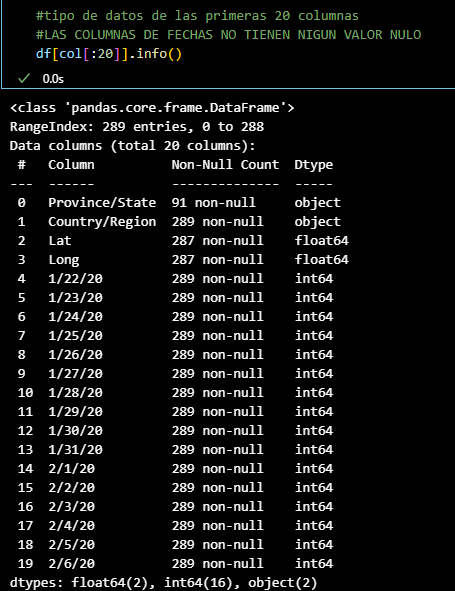

### <span style="color:BLUE; font-weight:bold">CAMBIO DE FORMATO EN LAS FECHAS</span>

In [96]:
# Se indentifico que la columna Fechas es de tipo string se pasa a Date
df_id['Fechas'] = pd.to_datetime(df_id['Fechas'], format='%m/%d/%y')
df_id.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 330327 entries, ('Afghanistan', nan) to ('Zimbabwe', nan)
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Lat     328041 non-null  float64       
 1   Long    328041 non-null  float64       
 2   Fechas  330327 non-null  datetime64[ns]
 3   Casos   330327 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 11.0+ MB


### <span style="color:RED; font-weight:bold">CORRECIÓN DE DATOS ACUMULADOS</span>

In [ ]:
df_fin_mes = df_id[df_id['Fechas'].dt.is_month_end]
df_fin_mes

,,Lat,Long,Fechas,Casos
Country/Region,Province/State,,,,
Afghanistan,NaN,33.939110,67.709953,2020-01-31,0
Albania,NaN,41.153300,20.168300,2020-01-31,0
Algeria,NaN,28.033900,1.659600,2020-01-31,0
Andorra,NaN,42.506300,1.521800,2020-01-31,0
Angola,NaN,-11.202700,17.873900,2020-01-31,0
...,...,...,...,...,...
West Bank and Gaza,NaN,31.952200,35.233200,2023-02-28,703228
Winter Olympics 2022,NaN,39.904200,116.407400,2023-02-28,535
Yemen,NaN,15.552727,48.516388,2023-02-28,11945


In [109]:
df_resultado = df_fin_mes.copy()
# 1. Agrupar por 'Country/Region' y luego calcular la diferencia usando diff()
#    Esto calcula la diferencia entre la fila actual y la anterior dentro de cada grupo.
df_resultado['Casos_Totales_Por_Mes'] = df_resultado.groupby('Country/Region')['Casos'].diff()


df_resultado['Casos_Totales_Por_Mes'] = df_resultado['Casos_Totales_Por_Mes'].fillna(df_resultado['Casos'])

df_resultado.head() # se saco los casos por mes 

,,Lat,Long,Fechas,Casos,Casos_Totales_Por_Mes
Country/Region,Province/State,,,,,
Afghanistan,NaN,33.93911,67.709953,2020-01-31,0,0.0
Albania,NaN,41.15330,20.168300,2020-01-31,0,0.0
Algeria,NaN,28.03390,1.659600,2020-01-31,0,0.0
Andorra,NaN,42.50630,1.521800,2020-01-31,0,0.0
Angola,NaN,-11.20270,17.873900,2020-01-31,0,0.0


In [110]:


# Agrupar por 'Country/Region' y 'Fechas' (mes), sumar casos mensuales
contagios_por_pais_mes = (
    df_resultado
    .groupby(['Country/Region', df_resultado['Fechas'].dt.to_period('M')])['Casos_Totales_Por_Mes']
    .sum()
    .reset_index()
    .rename(columns={'Fechas': 'Mes_Anio'})
)

# Convertir Period a string para mejor visualización (opcional)
contagios_por_pais_mes['Mes_Anio'] = contagios_por_pais_mes['Mes_Anio'].astype(str)

# Ordenar por casos descendente
contagios_por_pais_mes = contagios_por_pais_mes.sort_values('Casos_Totales_Por_Mes', ascending=False)

# Mostrar
contagios_por_pais_mes

,Country/Region,Mes_Anio,Casos_Totales_Por_Mes
7092,US,2022-01,20336435.0
3598,"Korea, South",2022-03,10102369.0
3056,India,2021-05,9010075.0
2418,France,2022-01,8951273.0
3055,India,2021-04,6943304.0
...,...,...,...
349,Australia,2020-08,-11.0
4035,Luxembourg,2020-08,-70.0
2155,Equatorial Guinea,2022-04,-93.0
1557,Congo (Brazzaville),2023-02,-298.0


In [ ]:
# 1. Ordenar el DataFrame df_fin_mes por la columna 'Casos_Totales_Por_Mes'
#    'ascending=False' ordena de mayor a menor.
df_ordenado = df_fin_mes.sort_values(by='Casos_Totales_Por_Mes', ascending=False)

# 2. (Opcional) Mostrar las primeras filas del DataFrame ordenado
df_ordenado.groupby()

                                   Lat    Long     Fechas     Casos Mes_Anio  \
Country/Region Province/State                                                  
France         NaN             46.2276  2.2137 2023-02-28  38579269  2023-02   
               NaN             46.2276  2.2137 2023-01-31  38482878  2023-01   
               NaN             46.2276  2.2137 2022-12-31  38266999  2022-12   
               NaN             46.2276  2.2137 2022-11-30  36829869  2022-11   
               NaN             46.2276  2.2137 2022-10-31  35825887  2022-10   

                               Casos_Totales_Por_Mes  Casos_nuevos_mes  
Country/Region Province/State                                           
France         NaN                        38575842.0        38579269.0  
               NaN                        38479451.0        38482878.0  
               NaN                        38263584.0        38266999.0  
               NaN                        36826454.0        36829869.0  
 

In [ ]:

# Crear una columna con Mes y Año 
df_id['Mes_Anio'] = df_id['Fechas'].dt.to_period('M')
df_id

,,Lat,Long,Fechas,Casos,Mes_Anio
Country/Region,Province/State,,,,,
Afghanistan,NaN,33.939110,67.709953,2020-01-22,0,2020-01
Albania,NaN,41.153300,20.168300,2020-01-22,0,2020-01
Algeria,NaN,28.033900,1.659600,2020-01-22,0,2020-01
Andorra,NaN,42.506300,1.521800,2020-01-22,0,2020-01
Angola,NaN,-11.202700,17.873900,2020-01-22,0,2020-01
...,...,...,...,...,...,...
West Bank and Gaza,NaN,31.952200,35.233200,2023-03-09,703228,2023-03
Winter Olympics 2022,NaN,39.904200,116.407400,2023-03-09,535,2023-03
Yemen,NaN,15.552727,48.516388,2023-03-09,11945,2023-03


### <span style="color:BLUE; font-weight:bold">RESPUESTA PREGUNTA 1</span>

1. ¿En cuál mes se presentó el mayor número de contagios?

El mes con mayor cantidad de numero de contagios es el mes de Enero del año 2023 como se puede evidenciar el la siguiente grafica y en la tabla del codigo que sigue donde esta el valor especifico de:

 20'669'212.563 CASOS

C:\Users\jeam2\AppData\Local\Temp\ipykernel_17064\165325334.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_long1['Fechas'] = pd.to_datetime(df_long1['Fechas'], errors='coerce', infer_datetime_format=True)
C:\Users\jeam2\AppData\Local\Temp\ipykernel_17064\165325334.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long1['Fechas'] = pd.to_datetime(df_long1['Fechas'], errors='coerce', infer_datetime_format=True)


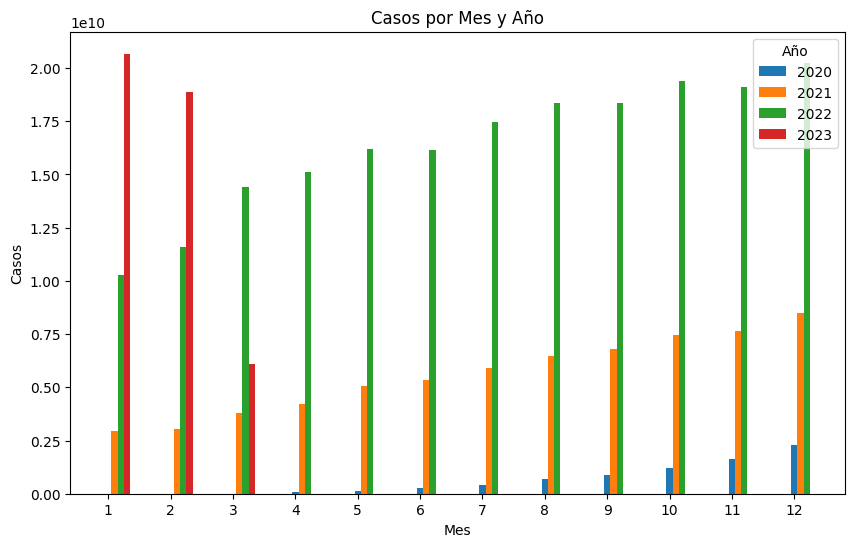

In [ ]:
#GRÁFICA CASOS X MES Y AÑO 
df_long1=df_long
df_long1['Fechas'] = pd.to_datetime(df_long1['Fechas'], errors='coerce', infer_datetime_format=True)
df_long1['Casos'] = pd.to_numeric(df_long1['Casos'], errors='coerce')
df_long1['Año'] = df_long1['Fechas'].dt.year
df_long1['Mes'] = df_long1['Fechas'].dt.month
df_grouped = df_long1.groupby(['Año', 'Mes'])['Casos'].sum().reset_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for year in df_grouped['Año'].unique():
    subset = df_grouped[df_grouped['Año'] == year]
    plt.bar(subset['Mes'] + (year - df_grouped['Año'].min()) * 0.1,  # desplazamiento pequeño
            subset['Casos'],
            width=0.1, 
            label=str(year))

plt.title('Casos por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Casos')
plt.legend(title='Año')
plt.xticks(range(1,13))
plt.show()


In [ ]:
# Agrupar por Mes y Año (Mes_Anio) y sumar los 'Casos'
contagios_por_mes = df_id.groupby('Mes_Anio')['Casos'].sum().sort_values(ascending=False)
contagios_por_mes

Mes_Anio
2023-01    20669212563
2022-12    20219478970
2022-10    19373033136
2022-11    19105754990
2023-02    18853048685
2022-08    18356410473
2022-09    18333709794
2022-07    17443312060
2022-05    16200184061
2022-06    16153898319
2022-04    15104213156
2022-03    14388530682
2022-02    11575136242
2022-01    10275647283
2021-12     8494815233
2021-11     7654886930
2021-10     7472886270
2021-09     6811806192
2021-08     6466654013
2023-03     6084442311
2021-07     5896174651
2021-06     5320134217
2021-05     5050689442
2021-04     4208287243
2021-03     3768712195
2021-02     3062477618
2021-01     2924193988
2020-12     2297773408
2020-11     1649038830
2020-10     1229740703
2020-09      895634440
2020-08      672203850
2020-07      431895049
2020-06      246832750
2020-05      145186182
2020-04       63571911
2020-03        8977762
2020-02        1672160
2020-01          38557
Freq: M, Name: Casos, dtype: int64

In [ ]:
'''
Obtener el Mes y Año con el mayor número de contagios a partir de la tabla generada anteriormente,
Se obtiene la tabla de todo el mes del mayor puesto que desde el orden descendiente de la tabla anterior indice 0
nos muestra el valor del primer elemento de la tabla
'''
mes_mayor_contagio = contagios_por_mes.index[0]


### <span style="color:BLUE; font-weight:bold">RESPUESTA PREGUNTA 2</span>

2. ¿En ese mismo mes, cuál fue el país que reportó más contagios? 


In [ ]:
'''
Se crea una nueva tabla con los valores de la fecha con mas contagiados siendo ENERO 2023
'''
# Filtrar el DataFrame original para obtener solo los registros de ese mes y año

df_mes_maximo = df_id.loc[df_id['Mes_Anio'] == mes_mayor_contagio]
df_mes_maximo

,,Lat,Long,Fechas,Casos,Mes_Anio
Country/Region,Province/State,,,,,
Afghanistan,NaN,33.939110,67.709953,2023-01-01,207616,2023-01
Albania,NaN,41.153300,20.168300,2023-01-01,333811,2023-01
Algeria,NaN,28.033900,1.659600,2023-01-01,271229,2023-01
Andorra,NaN,42.506300,1.521800,2023-01-01,47751,2023-01
Angola,NaN,-11.202700,17.873900,2023-01-01,105095,2023-01
...,...,...,...,...,...,...
West Bank and Gaza,NaN,31.952200,35.233200,2023-01-31,703228,2023-01
Winter Olympics 2022,NaN,39.904200,116.407400,2023-01-31,535,2023-01
Yemen,NaN,15.552727,48.516388,2023-01-31,11945,2023-01


In [ ]:
# Agrupar por país en ese mes y encontrar el máximo
# Respuesta de la pregunta 2
pais_max_contagio = df_mes_maximo.groupby('Country/Region')['Casos'].sum().idxmax()
casos_pais_maximo = df_mes_maximo.groupby('Country/Region')['Casos'].sum().max()
print("El pais con mas contagios es: ",pais_max_contagio, "y la cantidad de numero de casos en el mes de ENERO 2023 es: ",casos_pais_maximo)


El pais con mas contagios es:  US y la cantidad de numero de casos en el mes de ENERO 2023 es:  3152507640


### <span style="color:BLUE; font-weight:bold">RESPUESTA PREGUNTA 3</span>

3. ¿Cuál es el país con el menor número de casos reportados hasta la 
fecha?

In [ ]:
# Pregunta 3: País con el menor número de casos reportados hasta la fecha

# Agrupar por País y sumar los 'Casos' totales durante todo el periodo de tiempo del dataframe
contagios_por_pais_total = df_id.groupby('Country/Region')['Casos'].sum()
contagios_por_pais_total

Country/Region
Afghanistan             129988469
Albania                 185562654
Algeria                 182741650
Andorra                  24547525
Angola                   60025203
                          ...    
West Bank and Gaza      412543696
Winter Olympics 2022       214462
Yemen                     7879435
Zambia                  195953683
Zimbabwe                140385286
Name: Casos, Length: 201, dtype: int64

In [ ]:
# Encontrar el país con la menor suma de casos
# Respuesta de la pregunta 3
pais_menor_contagio = contagios_por_pais_total.idxmin()
casos_pais_minimo = contagios_por_pais_total.min()
pais_menor_contagio


'Korea, North'

In [ ]:
print("El pais con menos contagios es: ",pais_menor_contagio, "y la cantidad de numero de casos totalizado es: ",casos_pais_minimo)


El pais con menos contagios es:  Korea, North y la cantidad de numero de casos totalizado es:  300


## <span style="color:BLUE; font-weight:bold">REFLEXIÓN</span>

<ol style="color:black; font-size:16px; line-height:1.6;">
  <li>
    <b>¿Cuál es la importancia del uso de una herramienta de limpieza y preparación de datos como Pandas para gestionar datos en el contexto de la Ciencia de Datos?</b>
    <br><br>
    <span style="color:#2B2B2B.;">
      <b>R/</b> El uso de <b>Pandas</b> en la ciencia de datos es esencial para limpiar, transformar y analizar información. 
      Su eficiencia permite preparar datos de alta calidad antes de su almacenamiento en un <b>Data Lake</b>, 
      mejorando la consistencia y reduciendo la redundancia. Además, facilita la integración con otras herramientas del ecosistema 
      <b>Python</b>, optimizando la gestión y reutilización de los datos.
    </span>
  </li>
  <br>
  <li>
    <b>¿Cómo podría ayudar esta herramienta para mejorar el almacenamiento en un Data Lake?</b>
    <br><br>
    <span style="color:#2B2B2B.;">
      <b>R/</b> Un <b>Data Lake</b> funciona como un repositorio centralizado donde se almacenan cualquier tipo de datos en su formato original, 
      sin necesidad de definir una estructura previa. <b>Pandas</b> puede ayudar a filtrar, validar y transformar los datos antes de su ingreso, 
      evitando la acumulación de información redundante o de baja calidad. Esto mejora la gobernanza, la seguridad y la eficiencia del 
      <b>Data Lake</b>, permitiendo que los datos sean más accesibles y confiables para herramientas de análisis avanzado, inteligencia artificial 
      o aprendizaje automático, dependiendo del negocio y de los objetivos planteados.
    </span>
  </li>
</ol>

## <span style="color:BLUE; font-weight:bold">BIBLIOGRAFÍA</span>

<ul style="color:darkblue;">
  <li>Pandas Documentation. (2024). <i>pandas.pydata.org</i>. Recuperado de <a href="https://pandas.pydata.org" style="color:skyblue;">https://pandas.pydata.org</a></li>
  <li>Amazon Web Services. (2023). <i>What is a Data Lake?</i> Recuperado de <a href="https://aws.amazon.com/big-data/datalakes-and-analytics/what-is-a-data-lake/" style="color:skyblue;">aws.amazon.com</a></li>
</ul>